# Numerical Integration

In [15]:
# %load integral.py
import random as rm

rm.seed(3)
#The function to be integrated f(x)=x^2
f =  lambda x: x**3

#The interval where we must integrate
a = -1.0
b = 0

NumSteps = 1000000 
ymin = f(a)
ymax = ymin
#Here we find the upper bound to f(x)
for i in range(NumSteps):
    x = a + (b - a) * float(i) / NumSteps
    y = f(x)
    if y < ymin: ymin = y
    if y > ymax: ymax = y

# Define the Area of the rectangle
A = (b - a) * (ymax - ymin)
n = 1000000
#Initialize the number of cases where y_i<=f(x_i)
R = 0
for j in range(n):
    x = a + (b - a) * rm.random()
    y = ymin + (ymax - ymin) * rm.random()
    if abs(y) <= abs(f(x)):
        if f(x) > 0 and y > 0 and y <= f(x):
            R += 1 
        if f(x) < 0 and y < 0 and y >= f(x):
            R -= 1 

NumIntegral = R / n * A
print ("Numerical integration = " + str(NumIntegral))


Numerical integration = -0.249378


# Forecasting Stock Market Prices

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

In [3]:
dataset = pd.read_csv('AMZN.csv',header=0, usecols=['Date', 'Close'], parse_dates=True, index_col='Date')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4529 entries, 2000-06-05 to 2018-06-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4529 non-null   float64
dtypes: float64(1)
memory usage: 70.8 KB


In [4]:
dataset.describe()

,Close
count,4529.000000
mean,243.952496
std,323.696425
min,5.970000
25%,38.740002
50%,87.269997
75%,306.540009
max,1696.349976


We can see that the Amazon stock prices have made a noticeable change over the time; The minimun value is equal to $\$5,97$, while the maximum value is equal to $\$1.696,35$. Also the standard desviation value are high, indicating **high volatility**

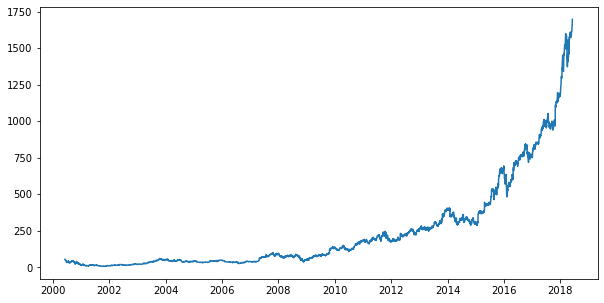

In [5]:
plt.figure(figsize=(10,5))
plt.plot(dataset)
plt.show()

For the analysis of this plot , we can see that prices have increased. In particular, starting from 2015, this increase as shown an exponential trend.

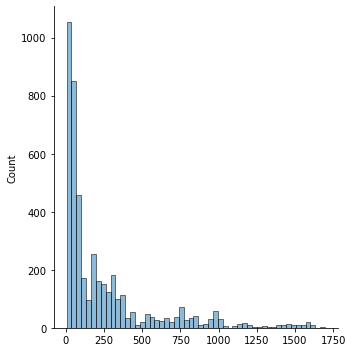

In [6]:
sns.displot(dataset, legend = False)

## Time series study

In [7]:
DataPctChange = dataset.pct_change()
LogReturns = np.log(1 + DataPctChange) 
LogReturns.tail(10)

,Close
Date,
2018-05-22,-0.002564
2018-05-23,0.012855
2018-05-24,0.000755
2018-05-25,0.004407
2018-05-29,0.001688
2018-05-30,0.007425
2018-05-31,0.002907
2018-06-01,0.007288
2018-06-04,0.014352


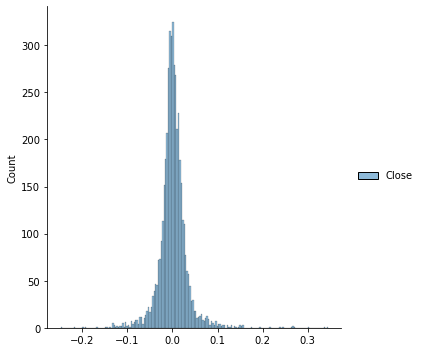

In [16]:
sns.displot(DataPctChange)

We calculate the logarithm of the variation for certain benefits:
* **Log normality**: If we assume that prices are distributed log normality, then $\log(1+pctchange_t)$ is normally distributed.
* **Approxiamte raw-log equality**: When the percentil change is very small, then $\log(1+pctchange_t) \approx pctchange_t$

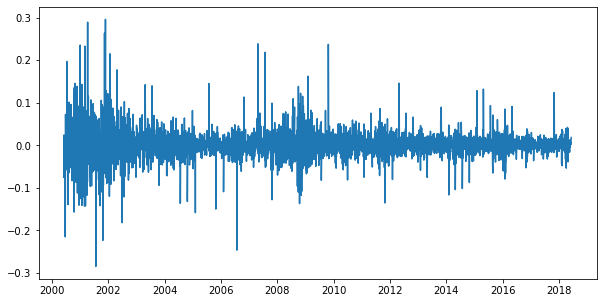

In [8]:
plt.figure(figsize=(10,5))
plt.plot(LogReturns)
plt.show()

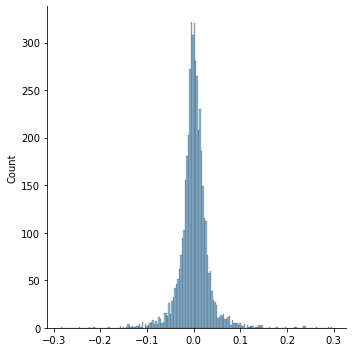

In [9]:
sns.displot(LogReturns, legend = False)

## Geometric Brownian Model

In [10]:
MeanLogReturns = np.array(LogReturns.mean())

VarLogReturns = np.array(LogReturns.var()) 

StdevLogReturns = np.array(LogReturns.std()) 

Drift = MeanLogReturns - (0.5 * VarLogReturns)
"Drift = "+ str(Drift)

'Drift = [0.00023356]'

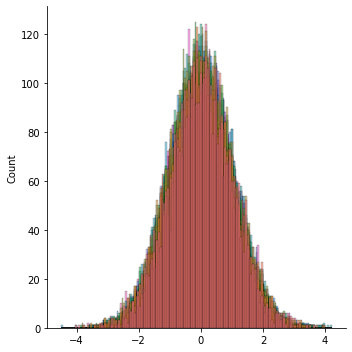

In [11]:
NumberIntervals = 4529

Iterations = 25

np.random.seed(0)
B = norm.ppf(np.random.rand(NumberIntervals, Iterations))

sns.displot(B, legend = False)

In [12]:
DailyReturns = np.exp(Drift + StdevLogReturns * B)

## Monte Carlo Simulation

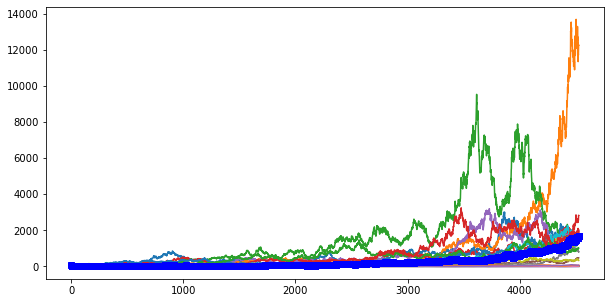

In [13]:
StockPrices0 = dataset.iloc[0]

StockPrice = np.zeros_like(DailyReturns)

StockPrice[0] = StockPrices0

for t in range(1, NumberIntervals):

    StockPrice[t] = StockPrice[t - 1] * DailyReturns[t]
    
plt.figure(figsize=(10,5))

plt.plot(StockPrice)   

df1 = np.array(dataset.iloc[:, 0:1])

plt.plot(df1,'bs')   